In [2]:
from nba_api.stats.static import players, teams
from nba_api.stats.endpoints import playercareerstats, PlayerGameLog
from nba_api.live.nba.endpoints import scoreboard
from nba_api.stats.endpoints import leaguedashplayerstats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def find_active_players():
    all_players = players.get_players()
    active_players = []
    for player in all_players:
        if player["is_active"] is True:
            active_players.append(player["full_name"])
    return active_players

In [36]:
active_players = find_active_players()
active_players

['Precious Achiuwa',
 'Steven Adams',
 'Bam Adebayo',
 'Ochai Agbaji',
 'Santi Aldama',
 'Trey Alexander',
 'Nickeil Alexander-Walker',
 'Grayson Allen',
 'Jarrett Allen',
 'Jose Alvarado',
 'Kyle Anderson',
 'Giannis Antetokounmpo',
 'Cole Anthony',
 'OG Anunoby',
 'Taran Armstrong',
 'Deni Avdija',
 'Deandre Ayton',
 'Marcus Bagley',
 'Marvin Bagley III',
 'Patrick Baldwin Jr.',
 'LaMelo Ball',
 'Lonzo Ball',
 'Mo Bamba',
 'Paolo Banchero',
 'Desmond Bane',
 'Dalano Banton',
 'Dominick Barlow',
 'Harrison Barnes',
 'Scottie Barnes',
 'RJ Barrett',
 'Charles Bassey',
 'Emoni Bates',
 'Jamison Battle',
 'Nicolas Batum',
 'Damion Baugh',
 'Bradley Beal',
 'Malik Beasley',
 'MarJon Beauchamp',
 'Reece Beekman',
 'Saddiq Bey',
 'Goga Bitadze',
 'Bismack Biyombo',
 'Anthony Black',
 'Bogdan Bogdanović',
 'Bol Bol',
 'Adem Bona',
 'Devin Booker',
 'Brandon Boston',
 'Chris Boucher',
 'Jamaree Bouyea',
 'Tony Bradley',
 'Malaki Branham',
 'Christian Braun',
 'Jalen Bridges',
 'Mikal Bridges'

In [29]:
def stats_players(nom, active_players, season):
    if nom in active_players:
            player_sheet = players.find_players_by_full_name(nom)[0]
            player_id = player_sheet["id"]
            stats = PlayerGameLog(player_id=player_id,season=season)
            result = stats.get_data_frames()[0]
    else:
          print(f"Le joueur {nom} n'est pas actif ou n'existe pas ")
          return None
    return result

    

In [39]:
stats_players("Stephen Curry", active_players,"2023-24")


,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,201939,0022301182,"Apr 12, 2024",GSW vs. NOP,L,32,12,23,0.522,...,4,4,5,1,0,7,2,33,-8,1
1,22023,201939,0022301169,"Apr 11, 2024",GSW @ POR,W,36,8,22,0.364,...,7,7,8,1,2,2,0,22,7,1
2,22023,201939,0022301155,"Apr 09, 2024",GSW @ LAL,W,32,7,9,0.778,...,7,7,8,1,2,1,2,23,13,1
3,22023,201939,0022301097,"Apr 05, 2024",GSW @ DAL,L,35,9,23,0.391,...,5,6,5,1,0,2,2,28,-5,1
4,22023,201939,0022301113,"Apr 04, 2024",GSW @ HOU,W,31,9,14,0.643,...,6,6,6,0,0,3,2,29,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,22023,201939,0022300126,"Nov 01, 2023",GSW vs. SAC,W,32,7,15,0.467,...,4,5,3,0,0,7,3,21,-6,1
70,22023,201939,0022300108,"Oct 30, 2023",GSW @ NOP,W,30,15,22,0.682,...,5,5,5,2,0,3,1,42,13,1
71,22023,201939,0022300096,"Oct 29, 2023",GSW @ HOU,W,31,6,16,0.375,...,6,7,6,0,1,1,1,24,-2,1
72,22023,201939,0022300087,"Oct 27, 2023",GSW @ SAC,W,35,14,19,0.737,...,3,4,4,2,0,4,0,41,10,1


In [11]:
non = players.find_players_by_full_name("LeBron James")[0]

non["id"]

2544

In [22]:
oui = PlayerGameLog(player_id= 2544 , season='2023-24', season_type_all_star='Regular Season')
oui.get_data_frames()[0]

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,2544,0022301195,"Apr 14, 2024",LAL @ NOP,W,38,11,20,0.550,...,9,11,17,5,1,4,0,28,19,1
1,22023,2544,0022301177,"Apr 12, 2024",LAL @ MEM,W,41,13,20,0.650,...,7,9,5,2,0,8,1,37,-3,1
2,22023,2544,0022301155,"Apr 09, 2024",LAL vs. GSW,L,36,14,22,0.636,...,6,7,11,2,0,4,0,33,-6,1
3,22023,2544,0022301127,"Apr 06, 2024",LAL vs. CLE,W,36,10,18,0.556,...,5,5,12,1,1,5,1,24,10,1
4,22023,2544,0022301103,"Apr 03, 2024",LAL @ WAS,W,36,9,18,0.500,...,5,7,9,3,0,4,2,25,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,22023,2544,0022300127,"Nov 01, 2023",LAL vs. LAC,W,42,13,19,0.684,...,12,12,7,1,2,4,3,35,6,1
67,22023,2544,0022300111,"Oct 30, 2023",LAL vs. ORL,W,33,7,17,0.412,...,3,3,4,3,1,5,0,19,5,1
68,22023,2544,0022300100,"Oct 29, 2023",LAL @ SAC,L,39,11,19,0.579,...,15,15,8,0,0,8,2,27,-5,1
69,22023,2544,0022300076,"Oct 26, 2023",LAL vs. PHX,W,35,7,14,0.500,...,7,8,9,2,2,5,1,21,22,1


In [ ]:
lebron = players.find_players_by_full_name("LeBron James")[0]
player_id = lebron['id']

2544

In [8]:
log = PlayerGameLog(player_id=player_id, season='2023-24', season_type_all_star='Regular Season')
df = log.get_data_frames()[0]
print(df)


   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22023       2544  0022301195  Apr 14, 2024    LAL @ NOP  W   38   11   
1      22023       2544  0022301177  Apr 12, 2024    LAL @ MEM  W   41   13   
2      22023       2544  0022301155  Apr 09, 2024  LAL vs. GSW  L   36   14   
3      22023       2544  0022301127  Apr 06, 2024  LAL vs. CLE  W   36   10   
4      22023       2544  0022301103  Apr 03, 2024    LAL @ WAS  W   36    9   
..       ...        ...         ...           ...          ... ..  ...  ...   
66     22023       2544  0022300127  Nov 01, 2023  LAL vs. LAC  W   42   13   
67     22023       2544  0022300111  Oct 30, 2023  LAL vs. ORL  W   33    7   
68     22023       2544  0022300100  Oct 29, 2023    LAL @ SAC  L   39   11   
69     22023       2544  0022300076  Oct 26, 2023  LAL vs. PHX  W   35    7   
70     22023       2544  0022300061  Oct 24, 2023    LAL @ DEN  L   29   10   

    FGA  FG_PCT  ...  DREB  REB  AST  STL  BLK  TOV

In [11]:
df[['PTS', 'REB', 'AST']].mean()

PTS    25.661972
REB     7.295775
AST     8.295775
dtype: float64

In [13]:
df_sorted = df.sort_values('GAME_DATE')
df_sorted

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
5,22023,2544,0022301094,"Apr 02, 2024",LAL @ TOR,W,29,10,12,0.833,...,4,4,9,0,0,1,0,23,13,1
4,22023,2544,0022301103,"Apr 03, 2024",LAL @ WAS,W,36,9,18,0.500,...,5,7,9,3,0,4,2,25,9,1
3,22023,2544,0022301127,"Apr 06, 2024",LAL vs. CLE,W,36,10,18,0.556,...,5,5,12,1,1,5,1,24,10,1
2,22023,2544,0022301155,"Apr 09, 2024",LAL vs. GSW,L,36,14,22,0.636,...,6,7,11,2,0,4,0,33,-6,1
1,22023,2544,0022301177,"Apr 12, 2024",LAL @ MEM,W,41,13,20,0.650,...,7,9,5,2,0,8,1,37,-3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,22023,2544,0022300271,"Nov 30, 2023",LAL @ OKC,L,35,7,12,0.583,...,10,12,6,1,1,5,1,21,-18,1
70,22023,2544,0022300061,"Oct 24, 2023",LAL @ DEN,L,29,10,16,0.625,...,7,8,5,1,0,0,1,21,7,1
69,22023,2544,0022300076,"Oct 26, 2023",LAL vs. PHX,W,35,7,14,0.500,...,7,8,9,2,2,5,1,21,22,1
68,22023,2544,0022300100,"Oct 29, 2023",LAL @ SAC,L,39,11,19,0.579,...,15,15,8,0,0,8,2,27,-5,1


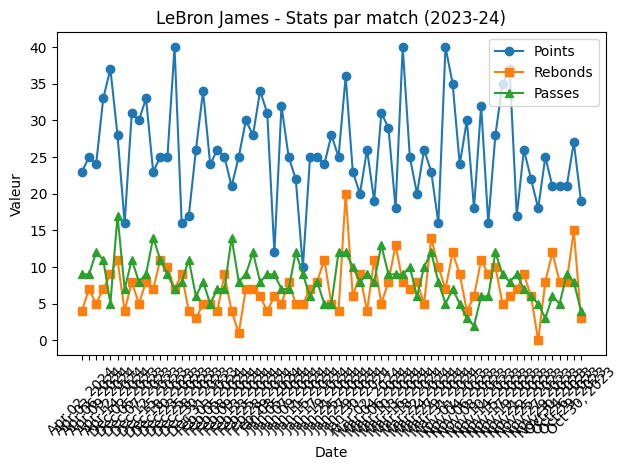

In [ ]:
plt.plot(df_sorted['GAME_DATE'], df_sorted['PTS'], label='Points', marker='o')
plt.plot(df_sorted['GAME_DATE'], df_sorted['REB'], label='Rebonds', marker='s')
plt.plot(df_sorted['GAME_DATE'], df_sorted['AST'], label='Passes', marker='^')
plt.xticks(rotation=45)
plt.title("LeBron James - Stats par match (2023-24)")
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.legend()
plt.tight_layout()
plt.show()